## 데이터 전처리 방향성
1) 결측치
    - New_Price -> 열 전체 날림
    - Mileage, Engine, Power, Seats -> 결측치 있는 행만 날림
    - Price -> 일단 날린 후, 1) 추후 회사별 가격 평균치로 보간 2) 회사별 + 차량 크기 평균치로 보간 3) +a....
2) 이상치
    - 찍어봐야 암

3) Name
    - 브랜드명 추출
4) Location
    - 그대로
5) Price
    - 결측치 제거
6) Year
    - 모르겠음
    - Kilometers_Driven 상관관계 확인
    - 기본 가정 : 최신일수록 덜 탔다 / 최신 모델이 더 비싸다
7) Kilometers_Driven
    - 기준같은거 정해도 될듯(나누기?)
8) Fuel_Type
    - 디젤,페트롤만 남기기
    - ev 데이터 2개밖에 없음
9) 'Owner_Type'
    - 수치형으로 바꿔야 될수도 있음
10) 'Mileage'
    - 단위 제거 / 형변환 

11) 'Engine'
    - 배기량에 따라 소/중/대 구분..? -> 파생변수 생성
    - 단위 제거 / 형변환 /단위 날리고 컬럼명에 (단위) 추가

12) 'Power'
    - 단위 제거 / 형변환 
    - null bhp 추가 제거
13) 'Seats'
    - '0' 날리기(1개)
    - 좌석수 & 크기 상관관계 (이상치 여부)

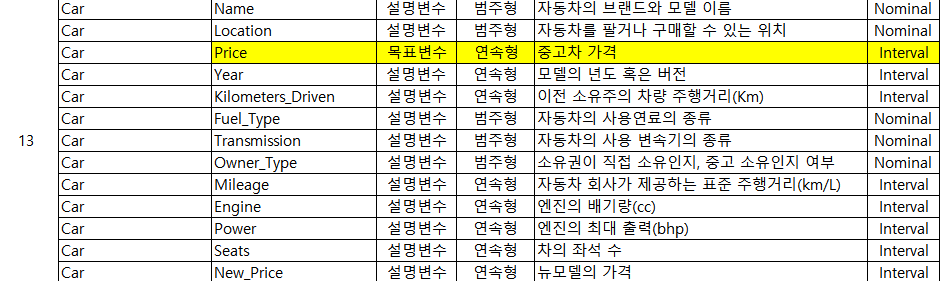

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../01/Car.csv')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


## 결측치 처리

In [4]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

### Price 컬럼(Y) 결측치 제외

In [5]:
df[df['Price'].isna()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
6019,Maruti Alto K10 LXI CNG,Delhi,NaN,2014,40929,CNG,Manual,First,32.26 kmpl,998 CC,58.2 bhp,4.0,NaN
6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,NaN,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
6022,Toyota Etios Liva GD,Hyderabad,NaN,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
6023,Hyundai i20 Magna,Mumbai,NaN,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
6024,Mahindra XUV500 W8 2WD,Coimbatore,NaN,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [6]:
df.dropna(subset=['Price'], inplace=True)

In [7]:
df[df['Price'].isna()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price


### New_Price 컬럼 제외

In [8]:
df.drop('New_Price',axis=1,inplace=True)

### Mileage / Engine / Power / Seats 열 결측치에 해당하는 행만 제거

In [9]:
df.dropna(subset=['Mileage','Engine','Power','Seats'],axis=0,inplace=True)

### Power열에 null bhp라는 결측치로 찍히지 않는 결측치 존재 -> 제거해야함

In [10]:
df[df['Power'] == 'null bhp'] 
df = df[df['Power'] != 'null bhp'] # 제거

In [11]:
df # 6053 rows

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0


## 단위제거 및 형변환
- 단위 들어가 있는 컬럼 단위 제거 후 수치형으로 변환
- ex. Mileage : 17.8 kmpl -> 17.8

In [12]:
df['Mileage'] = df['Mileage'].str.replace('kmpl','').astype('float')
df['Engine'] = df['Engine'].str.replace('CC','').astype('float')
df['Power'] = df['Power'].str.replace('bhp','').astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6053 entries, 0 to 7236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6053 non-null   object 
 1   Location           6053 non-null   object 
 2   Price              6053 non-null   float64
 3   Year               6053 non-null   int64  
 4   Kilometers_Driven  6053 non-null   int64  
 5   Fuel_Type          6053 non-null   object 
 6   Transmission       6053 non-null   object 
 7   Owner_Type         6053 non-null   object 
 8   Mileage            6053 non-null   float64
 9   Engine             6053 non-null   float64
 10  Power              6053 non-null   float64
 11  Seats              6053 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 614.8+ KB


## 파생변수 생성

In [16]:
# Name열 split 후 회사명(브랜드)만 리턴하는 함수
def extract_brand(text):
    return text.split()[0]

df['Brand'] = df['Name'].apply(extract_brand)
df['Brand'].head()

0     Maruti
1    Hyundai
2      Honda
3     Maruti
4       Audi
Name: Brand, dtype: object

In [17]:
df['Brand'].value_counts()

Maruti           1218
Hyundai          1079
Honda             614
Toyota            406
Mercedes-Benz     323
Volkswagen        320
Ford              298
Mahindra          278
BMW               268
Audi              240
Tata              192
Skoda             181
Renault           151
Chevrolet         120
Nissan             93
Land               57
Jaguar             43
Mitsubishi         34
Mini               29
Fiat               26
Volvo              21
Jeep               19
Datsun             17
Porsche            16
ISUZU               3
Force               3
Bentley             2
Ambassador          1
Lamborghini         1
Name: Brand, dtype: int64

In [14]:
# Power 기준 차량 크기 구분하는 함수
# 경차 -> 1000 미만
# 소형 -> 1600 미만
# 중형 -> 2000 미만
# 대형 -> 2000 이상
def car_size(cc):
    if cc >= 2000:
        car_size = 'full'
    elif cc >= 1600:
        car_size = 'mid'
    elif cc > 1000:
        car_size = 'small'
    else:
        car_size = 'light'
        
    return car_size

df['Size']= df['Engine'].apply(car_size)

In [15]:
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Size
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,light
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,small
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,small
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,small
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,mid


In [37]:
len(df['Name'].unique())

1856

## 이상치

In [113]:
len(df['Brand'].unique())

29

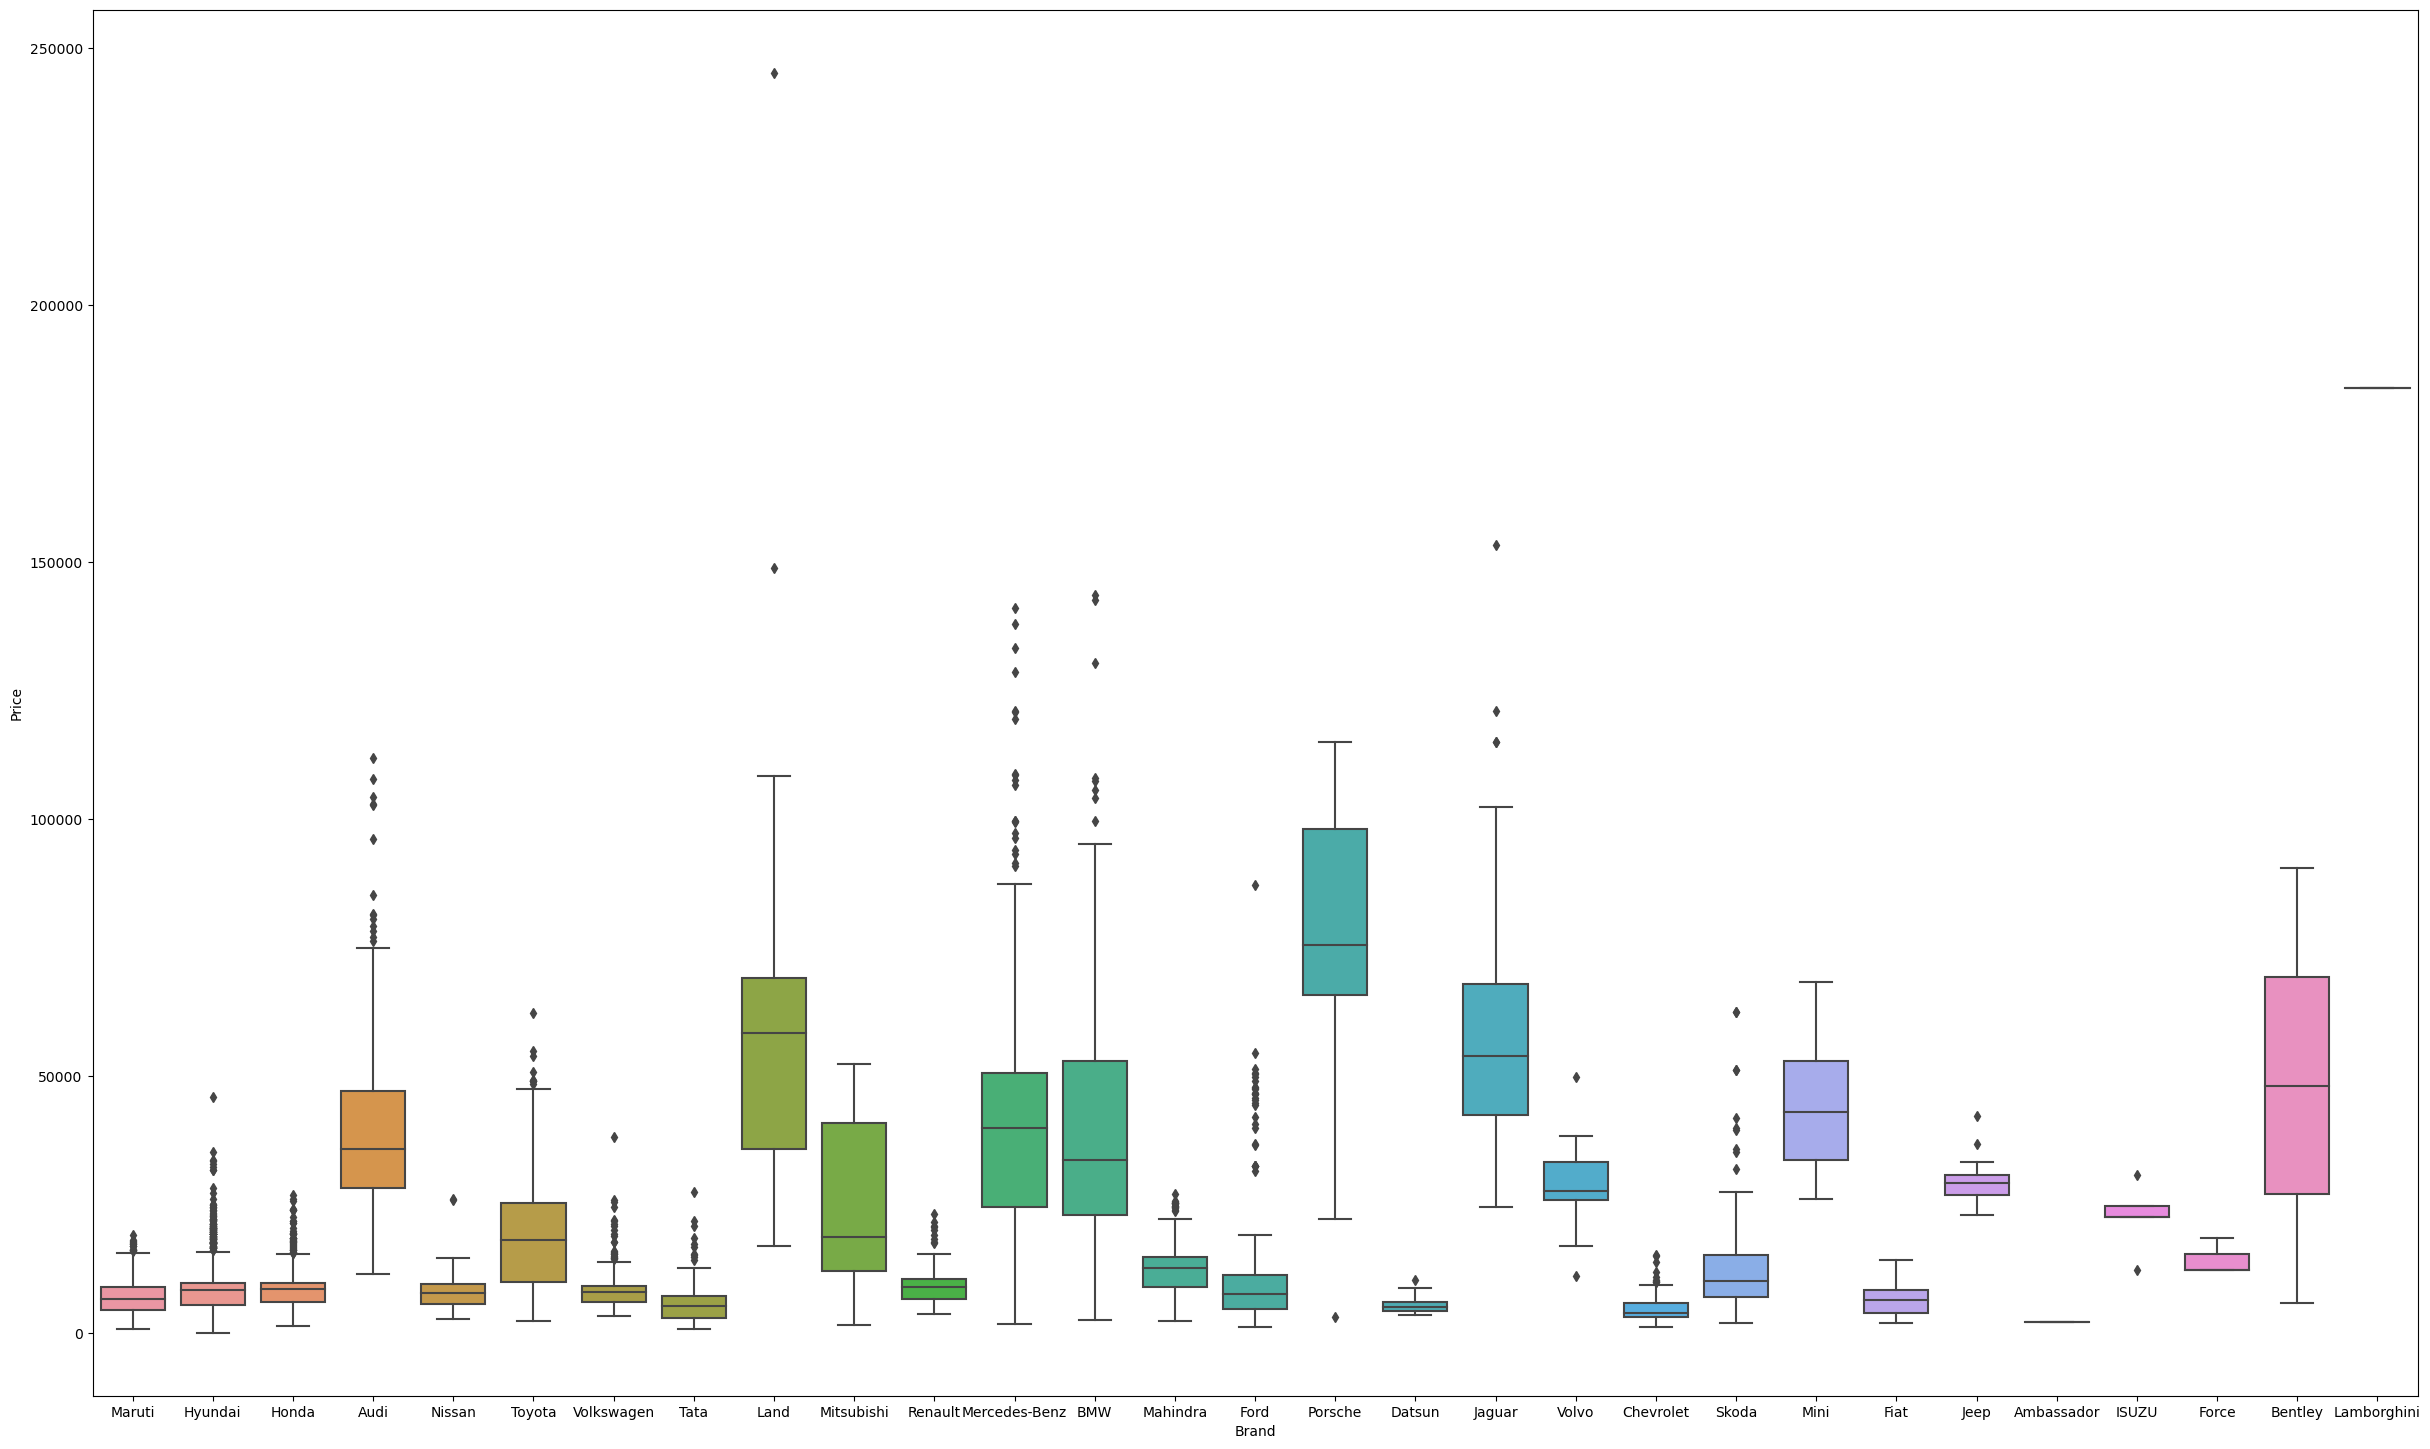

In [114]:
plt.figure(figsize=(30,18))
sns.boxplot(x='Brand',y='Price',data=df)
plt.show()

In [ ]:
df['Kilometers_Driven'].boxplot()

In [125]:
df[df['Kilometers_Driven'] > 6000000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Size
2328,BMW X5 xDrive 30d M Sport,Chennai,99642.4,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,BMW,full


In [115]:
Land 혼자 비싼 친구 -> price 최대값

SyntaxError: invalid syntax (2423740540.py, line 1)